In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("loan_prediction.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']:
    df[col] = le.fit_transform(df[col])

# Drop Loan_ID
df.drop(['Loan_ID'], axis=1, inplace=True)

# Scale numerical features
scaler = StandardScaler()
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(
    df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
)

df.head()


C:\Users\ap909\AppData\Local\Temp\ipykernel_5632\345595604.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ap909\AppData\Local\Temp\ipykernel_5632\345595604.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features & target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7560975609756098

Confusion Matrix:
 [[18 25]
 [ 5 75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [5]:
import joblib

joblib.dump(model, "loan_approval_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


C:\Users\ap909\AppData\Local\Temp\ipykernel_5632\2305289367.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


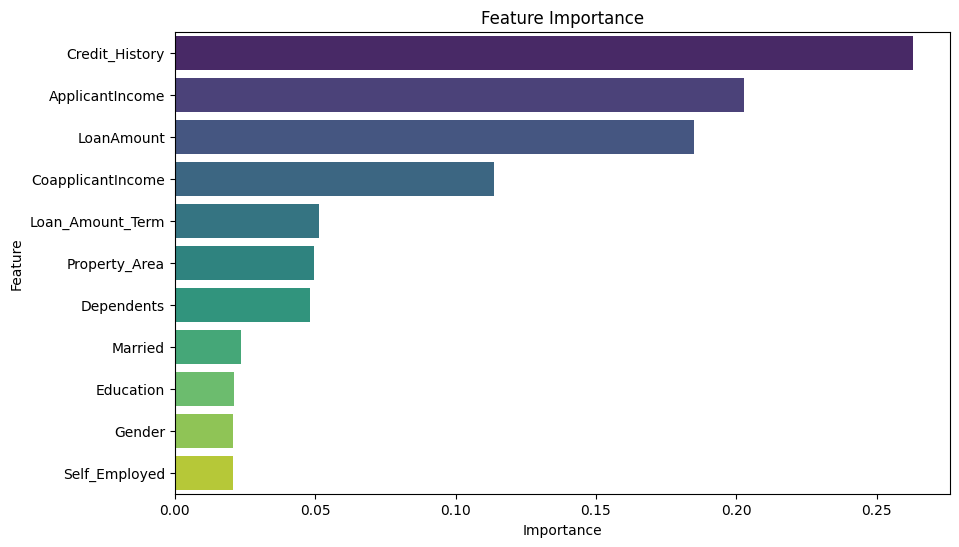

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Evaluate tuned model
y_pred = best_model.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after tuning: 0.7804878048780488


In [8]:
import joblib
joblib.dump(best_model, "loan_approval_final_model.pkl")
print("✅ Final model saved successfully!")


✅ Final model saved successfully!


In [15]:
# Step 10: Predict on new loan application
from sklearn.preprocessing import StandardScaler

# Numerical columns
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# Fit scaler on training data (or use your existing scaler)
scaler = StandardScaler()
scaler.fit(df[num_cols])

# New input data (must have ALL 11 features in the same order as training dataset)
# ['Gender','Married','Education','Self_Employed','ApplicantIncome',
#  'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',
#  'Property_Area','Dependents']
new_data = [[1, 0, 0, 0, 5000, 0, 100, 360, 1, 2, 0]]  # Example values

# Scale numerical features together
import numpy as np
new_data_np = np.array(new_data, dtype=float)  # convert to numpy array
new_data_np[:, 4:8] = scaler.transform(new_data_np[:, 4:8])  # scale columns 4,5,6,7

# Predict loan status
prediction = best_model.predict(new_data_np)
print("Loan Status Prediction:", "Approved" if prediction[0]==1 else "Not Approved")




Loan Status Prediction: Approved


C:\Users\ap909\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ap909\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
